## Import Library

In [2356]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2357]:
# Load data
df = pd.read_csv("../Dataset/OnlineRetail.csv", encoding="unicode_escape")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### Data Understanding

In [2358]:
def summary(df, pred=None):
    types = df.dtypes
    counts = df.apply(lambda x: x.count())
    uniques = df.apply(lambda x: x.nunique())
    nulls = df.apply(lambda x: x.isnull().sum())

    # min aman untuk numerik dan string
    def safe_min(x):
        if x.dropna().empty:
            return None
        if pd.api.types.is_numeric_dtype(x):
            return x.min()
        return min(x.dropna().astype(str))

    min_vals = df.apply(safe_min)

    print('Data shape:', df.shape)

    cols = ['types', 'counts', 'uniques', 'nulls', 'min']
    result = pd.concat([types, counts, uniques, nulls, min_vals], axis=1)
    result.columns = cols

    print('___________________________')
    print(result.types.value_counts())
    print('___________________________')

    return result

details = summary(df)
display(details.sort_values(by='nulls', ascending=False))


Data shape: (541909, 8)
___________________________
types
object     5
float64    2
int64      1
Name: count, dtype: int64
___________________________


,types,counts,uniques,nulls,min
CustomerID,float64,406829,4372,135080,12346.0
Description,object,540455,4223,1454,4 PURPLE FLOCK DINNER CANDLES
StockCode,object,541909,4070,0,10002
InvoiceNo,object,541909,25900,0,536365
Quantity,int64,541909,722,0,-80995
InvoiceDate,object,541909,23260,0,1/10/2011 10:04
UnitPrice,float64,541909,1630,0,-11062.06
Country,object,541909,38,0,Australia


In [2359]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [2360]:
total_rows = df.shape[0]

qty_neg = df[df.Quantity < 0].shape[0]
price_neg = df[df.UnitPrice < 0].shape[0]

print(f"Quantity negatif values: {qty_neg} ({qty_neg/total_rows*100:.2f}%)")
print(f"UnitPrice negatif values: {price_neg} ({price_neg/total_rows*100:.2f}%)")

Quantity negatif values: 10624 (1.96%)
UnitPrice negatif values: 2 (0.00%)


In [2361]:
total_rows = df.shape[0]

qty_zero = df[df.Quantity == 0].shape[0]
price_zero = df[df.UnitPrice == 0].shape[0]

print(f"Quantity Zero values: {qty_zero} ({qty_zero/total_rows*100:.2f}%)")
print(f"Unit Price Zero values: {price_zero} ({price_zero/total_rows*100:.2f}%)")

Quantity Zero values: 0 (0.00%)
Unit Price Zero values: 2515 (0.46%)


In [2362]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [2363]:
df.duplicated().sum()

np.int64(5268)

In [2364]:
# display(df_stock_str.head(5))
display(df["StockCode"].astype(str).str.replace(r"\d", "_", regex=True).unique())

array(['_____A', '_____', '_____B', '_____G', '_____E', 'POST', '_____L',
       '_____C', '_____S', '_____BL', '_____N', 'D', '_____D', '_____F',
       '_____T', '_____H', '_____M', 'C_', '_____P', '_____J', '_____R',
       'DOT', '_____K', 'M', '_____V', '_____W', 'BANK CHARGES',
       '_____bl', '_____p', '_____b', '_____a', '_____l', '_____s',
       '_____c', '_____e', '_____I', '_____Y', '_____d', '_____f',
       '_____U', 'S', 'AMAZONFEE', '_____n', '_____Z', '_____O',
       'DCGS____', '_____k', 'gift________', 'm', '_____g', 'DCGSSBOY',
       'DCGSSGIRL', 'PADS', 'DCGS____P', 'B', 'CRUK', '_____GR',
       '_____LP'], dtype=object)

In [2365]:
stock_c = df[df["StockCode"].astype(str).str.startswith("C")]
display(len(stock_c))
display(stock_c.head(5))
display(stock_c["Description"].value_counts())

160

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1423,536540,C2,CARRIAGE,1,12/1/2010 14:05,50.0,14911.0,EIRE
12119,537368,C2,CARRIAGE,1,12/6/2010 12:40,50.0,14911.0,EIRE
12452,537378,C2,CARRIAGE,1,12/6/2010 13:06,50.0,14911.0,EIRE
19975,537963,C2,CARRIAGE,1,12/9/2010 11:30,50.0,13369.0,United Kingdom
20016,538002,C2,CARRIAGE,1,12/9/2010 11:48,50.0,14932.0,Channel Islands


Description
CARRIAGE           143
CRUK Commission     16
Name: count, dtype: int64

## Data Cleaning

In [2366]:
# Hapus transaksi dengan Quantity ≤ 0 atau UnitPrice ≤ 0 (hanya ambil yg > 0)
df_clean = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

qty_neg = df_clean[df_clean.Quantity < 0].shape[0]
price_neg = df_clean[df_clean.UnitPrice < 0].shape[0]

qty_zero = df_clean[df_clean.Quantity == 0].shape[0]
price_zero = df_clean[df_clean.UnitPrice == 0].shape[0]

print(f"Quantity negatif values after: {qty_neg} ({qty_neg/total_rows*100:.2f}%)")
print(f"UnitPrice negatif values after: {price_neg} ({price_neg/total_rows*100:.2f}%)")

print('=============================================')

print(f"Quantity Zero values after: {qty_zero} ({qty_zero/total_rows*100:.2f}%)")
print(f"Unit Price Zero values after: {price_zero} ({price_zero/total_rows*100:.2f}%)")

Quantity negatif values after: 0 (0.00%)
UnitPrice negatif values after: 0 (0.00%)
Quantity Zero values after: 0 (0.00%)
Unit Price Zero values after: 0 (0.00%)


In [2367]:
df_clean = df_clean.dropna(subset=['CustomerID'])
df_clean.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [2368]:
df_clean = df_clean.drop_duplicates()
df_clean.duplicated().sum()

np.int64(0)

In [2369]:
invoice_str = df_clean["InvoiceNo"].astype(str)
df_clean = df_clean[~invoice_str.str.startswith(('A', 'C'))]

In [2370]:
df_clean["InvoiceNo"].astype(str).str.replace(r"\d", "_", regex=True).value_counts()

InvoiceNo
______    392692
Name: count, dtype: int64

In [2371]:
df_clean = df_clean[~df_clean["StockCode"].isin([
    'D', 'POST', 'M', 'BANK CHARGES', 'ADJUST', 'PADS', 'DOT', 'AMAZONFEE', 'CRUK'
])]
df_clean = df_clean[~df_clean["StockCode"].astype(str).str.startswith(('TEST', 'SP', 'ADJUST', 'C'))]

In [2372]:
display(df_clean["StockCode"].astype(str).str.replace(r"\d", "_", regex=True).unique())

array(['_____A', '_____', '_____B', '_____G', '_____E', '_____L',
       '_____C', '_____S', '_____BL', '_____N', '_____D', '_____F',
       '_____T', '_____H', '_____M', '_____R', '_____K', '_____P',
       '_____V', '_____J', '_____W', '_____U', '_____Y', '_____I',
       '_____O', '_____Z'], dtype=object)

In [2373]:
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'], errors='coerce')
details = summary(df_clean)
display(details.sort_values(by='uniques', ascending=False))

Data shape: (391150, 8)
___________________________
types
object            4
float64           2
int64             1
datetime64[ns]    1
Name: count, dtype: int64
___________________________


,types,counts,uniques,nulls,min
InvoiceNo,object,391150,18402,0,536365
InvoiceDate,datetime64[ns],391150,17166,0,2010-12-01 08:26:00
CustomerID,float64,391150,4334,0,12346.0
Description,object,391150,3871,0,4 PURPLE FLOCK DINNER CANDLES
StockCode,object,391150,3659,0,10002
UnitPrice,float64,391150,355,0,0.04
Quantity,int64,391150,299,0,1
Country,object,391150,37,0,Australia


In [2374]:
cat_des_df = df_clean.groupby(["StockCode","Description"]).count().reset_index()

dup_sc = (
    cat_des_df.StockCode.value_counts()[cat_des_df.StockCode.value_counts() > 1]
    .reset_index()
)
dup_sc.columns = ['StockCode', 'count']

problem_code = dup_sc.loc[4, 'StockCode']
display(cat_des_df.StockCode.value_counts()[cat_des_df.StockCode.value_counts()>1].reset_index().head())

df[df['StockCode'] == problem_code]['Description'].unique()


,StockCode,count
0,23196,4
1,23236,4
2,22937,3
3,17107D,3
4,23203,3


array(['mailout', 'JUMBO BAG DOILEY PATTERNS',
       'JUMBO BAG VINTAGE DOILEY ', 'JUMBO BAG VINTAGE DOILY '],
      dtype=object)

In [2375]:
clean_desc = (
    df_clean.groupby("StockCode")["Description"]
      .agg(lambda x: x.mode()[0] if not x.mode().empty else x.iloc[0])
      .reset_index()
      .rename(columns={"Description": "CleanDescription"})
)

df_clean = df_clean.merge(clean_desc, on="StockCode", how="left")
df_clean["Description"] = df_clean["CleanDescription"]
df_clean = df_clean.drop(columns=["CleanDescription"])

df = df_clean


In [2376]:
df_clean[df_clean['StockCode'] == problem_code]['Description'].unique()


array(['JUMBO BAG VINTAGE DOILY '], dtype=object)

In [2377]:
# Check how many country
df_clean.Country.nunique()

37

In [2378]:
# Check the total Customer per Country
customer_country = df_clean[['Country','CustomerID']].drop_duplicates()
cust_group = customer_country.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID',ascending=False)
cust_group.head()

,Country,CustomerID
35,United Kingdom,3916
14,Germany,94
13,France,87
30,Spain,30
3,Belgium,25


In [2379]:
# Buat kolom TotalPrice untuk Monetary
df_clean['TotalPrice'] = df_clean['Quantity'] * df_clean['UnitPrice']
df_clean.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [2380]:
group_description_totalPrice = df_clean.groupby('Description', as_index=False).agg({'TotalPrice': 'sum'})
sorted_1 = group_description_totalPrice.sort_values(by='TotalPrice', ascending=False)
sorted_1['total_cumulative'] = sorted_1['TotalPrice'].cumsum()
sorted_1['percent_cumulative'] = 100 * sorted_1['total_cumulative'] / sorted_1['TotalPrice'].sum()
sorted_1['percent_cumulative'] = sorted_1['percent_cumulative'].round(2)
top_product = sorted_1.reset_index(drop=True)
top_product


,Description,TotalPrice,total_cumulative,percent_cumulative
0,"PAPER CRAFT , LITTLE BIRDIE",168469.60,168469.60,1.93
1,REGENCY CAKESTAND 3 TIER,142264.75,310734.35,3.56
2,WHITE HANGING HEART T-LIGHT HOLDER,100547.45,411281.80,4.71
3,JUMBO BAG RED RETROSPOT,85040.54,496322.34,5.68
4,MEDIUM CERAMIC TOP STORAGE JAR,81416.73,577739.07,6.61
...,...,...,...,...
3636,CAT WITH SUNGLASSES BLANK CARD,0.95,8737224.68,100.00
3637,PINK CRYSTAL GUITAR PHONE CHARM,0.85,8737225.53,100.00
3638,PURPLE FRANGIPANI HAIRCLIP,0.85,8737226.38,100.00
3639,VINTAGE BLUE TINSEL REEL,0.84,8737227.22,100.00


In [2381]:
idx = top_product[top_product['percent_cumulative'] == 80.01]
idx

,Description,TotalPrice,total_cumulative,percent_cumulative


In [2382]:
group_country_totalPrice = df_clean.groupby('Country', as_index=False,).agg({'TotalPrice':'sum'})
sorted_2 = group_country_totalPrice.sort_values(by='TotalPrice', ascending=False)
top_10 = sorted_2[:10]
top_10

,Country,TotalPrice
35,United Kingdom,7242855.32
23,Netherlands,283889.34
10,EIRE,257013.12
14,Germany,205381.15
13,France,183801.94
0,Australia,138103.81
30,Spain,55706.56
32,Switzerland,52441.95
19,Japan,37416.37
3,Belgium,36927.34


In [2383]:
df_clean.TotalPrice.sum()

np.float64(8737227.64)

In [2384]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391150 entries, 0 to 391149
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    391150 non-null  object        
 1   StockCode    391150 non-null  object        
 2   Description  391150 non-null  object        
 3   Quantity     391150 non-null  int64         
 4   InvoiceDate  391150 non-null  datetime64[ns]
 5   UnitPrice    391150 non-null  float64       
 6   CustomerID   391150 non-null  float64       
 7   Country      391150 non-null  object        
 8   TotalPrice   391150 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 26.9+ MB


In [2385]:
df_clean.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalPrice
count,391150.000000,391150,391150.000000,391150.000000,391150.000000
mean,13.145300,2011-07-10 19:37:34.766713600,2.874372,15295.171456,22.337281
min,1.000000,2010-12-01 08:26:00,0.040000,12346.000000,0.060000
25%,2.000000,2011-04-07 11:16:00,1.250000,13969.000000,4.950000
50%,6.000000,2011-07-31 12:05:00,1.950000,15159.000000,11.900000
75%,12.000000,2011-10-20 12:57:00,3.750000,16794.000000,19.800000
max,80995.000000,2011-12-09 12:50:00,649.500000,18287.000000,168469.600000
std,180.807831,NaN,4.284738,1710.339033,310.932442


In [2386]:
df_clean.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


## Exploratory Data Analysis

In [2387]:
top_customer = (
    df_clean.groupby("CustomerID")["TotalPrice"]
      .sum()
      .sort_values(ascending=False)
      .head(10)
      .reset_index()
)

top_item_qty_sum = (
    df_clean.groupby("Description")["Quantity"]
      .sum()
      .sort_values(ascending=False)
      .head(10)
      .reset_index()
)

top_item_qty_count = (
    df_clean.groupby("Description")["Quantity"]
      .count()
      .sort_values(ascending=False)
      .head(10)
      .reset_index()
)

C:\Users\Acer\AppData\Local\Temp\ipykernel_23052\2838163561.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


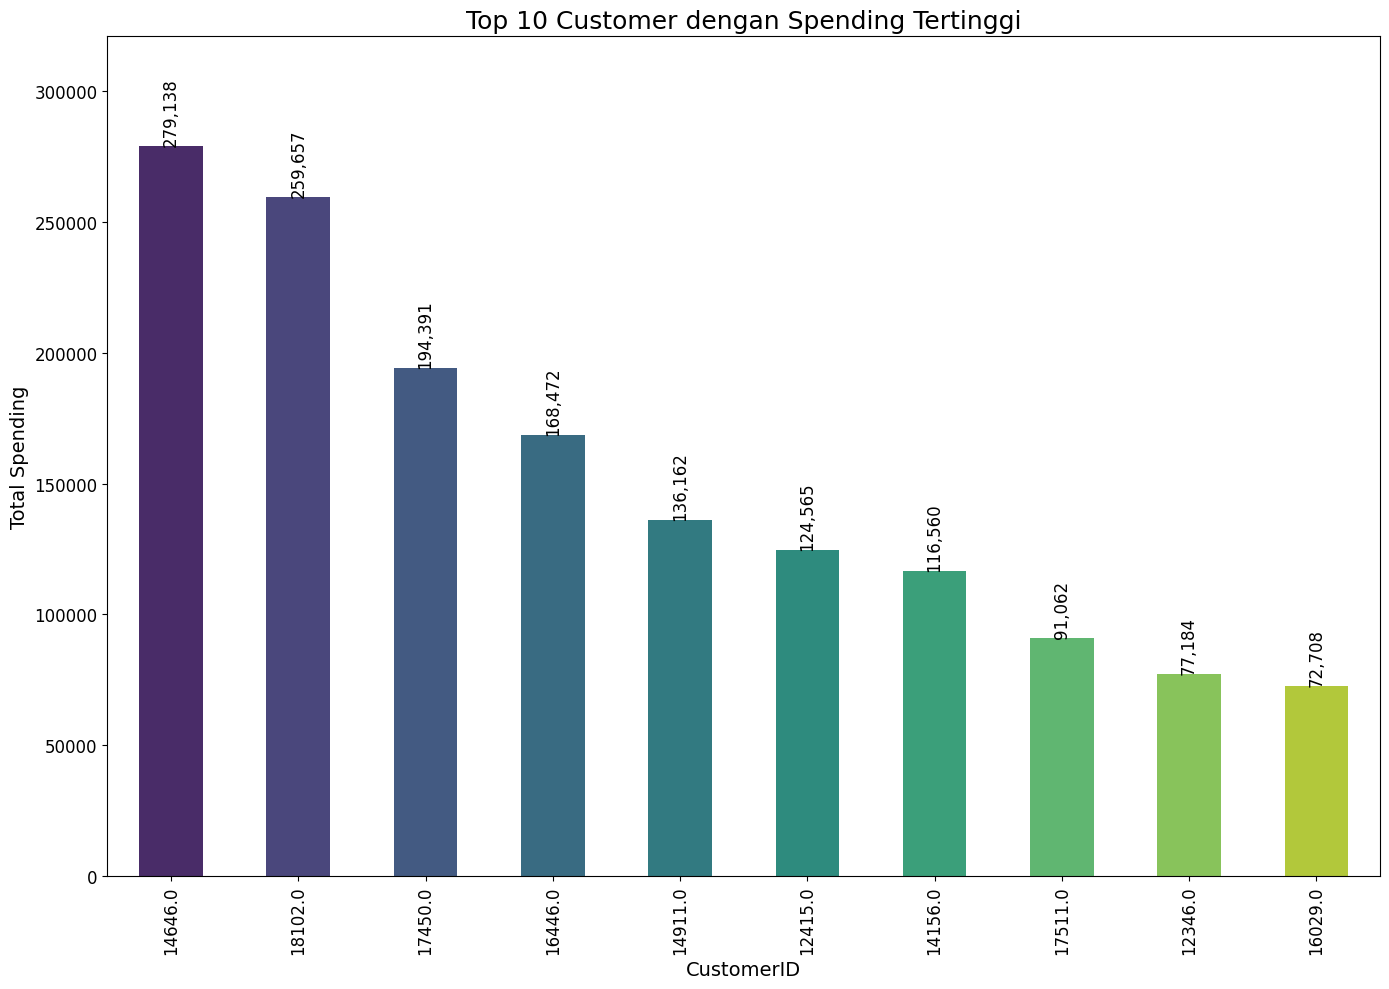

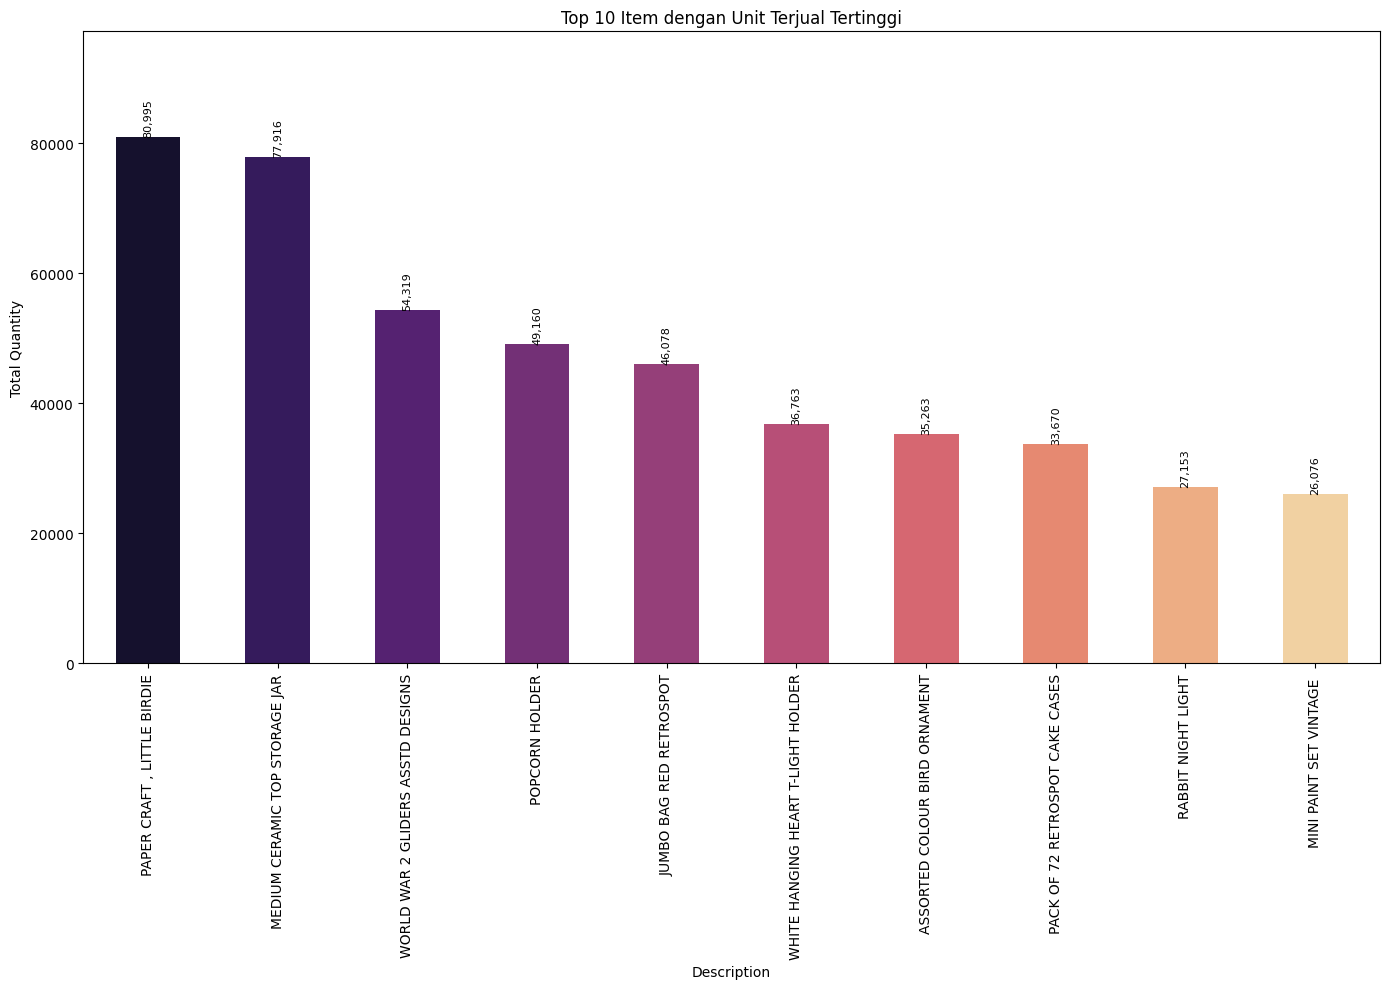

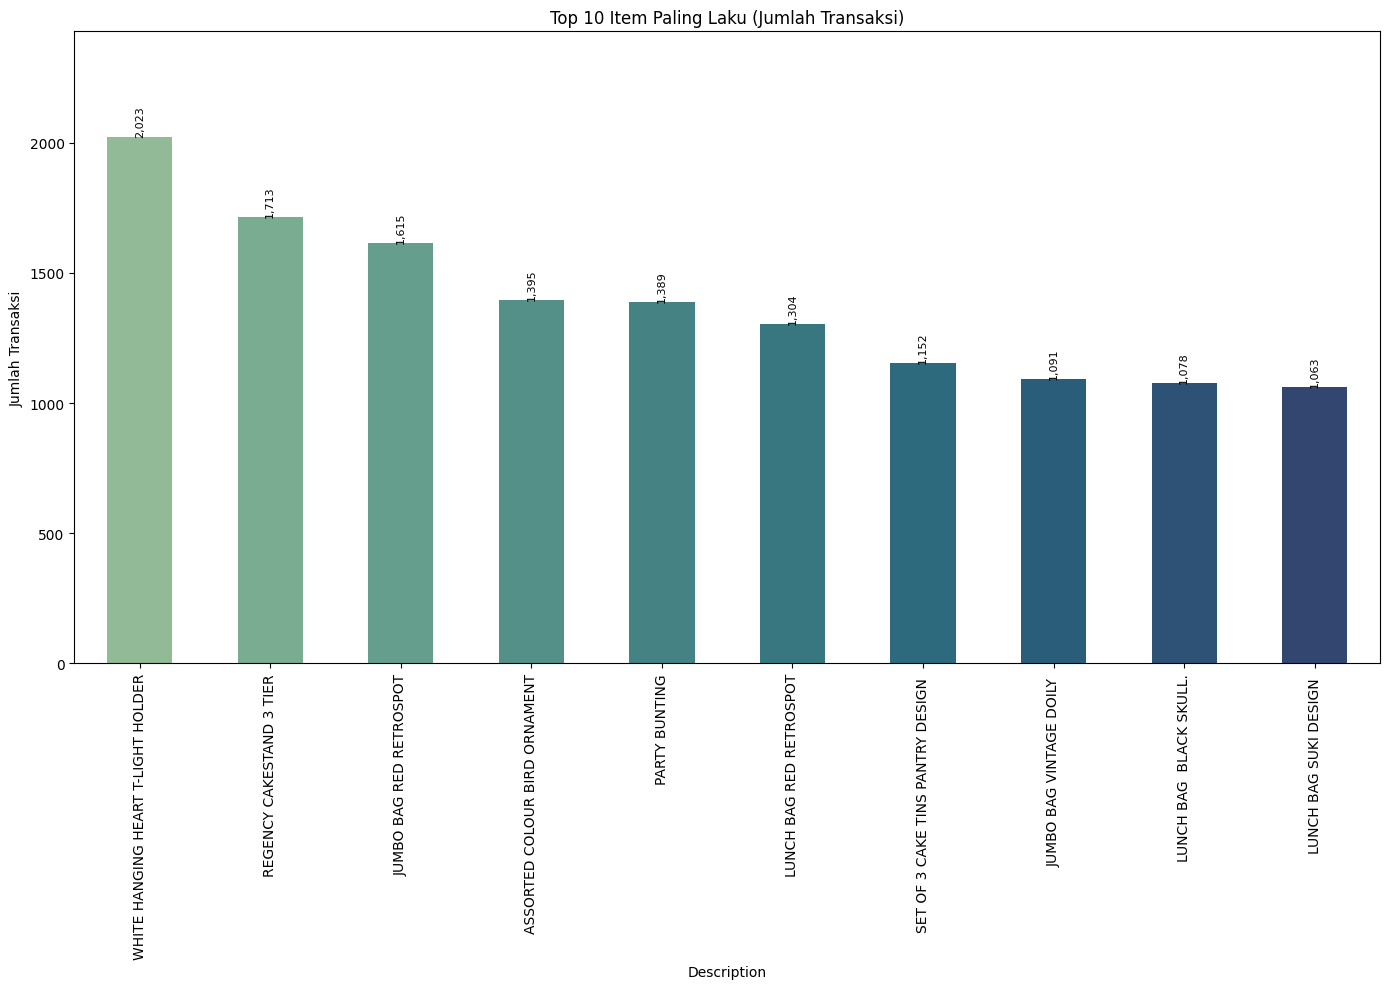

In [2388]:
plt.figure(figsize=(14, 10))
ax = sns.barplot(
    data=top_customer,
    x="CustomerID",
    y="TotalPrice",              
    legend=False ,
    order=top_customer.sort_values("TotalPrice", ascending=False)["CustomerID"],
    palette="viridis",
    width=0.5
)

ax.set_ylim(0, top_customer["TotalPrice"].max() * 1.15)

for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}',
                (p.get_x() + p.get_width()/2, p.get_height()),
                ha='center', va='bottom', fontsize=12, rotation=90)  # tulisan lebih besar

plt.title("Top 10 Customer dengan Spending Tertinggi", fontsize=18)
plt.xlabel("CustomerID", fontsize=14)
plt.ylabel("Total Spending", fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 10))
ax = sns.barplot(
    data=top_item_qty_sum,
    x="Description",
    y="Quantity",
    hue="Description",
    order=top_item_qty_sum.sort_values("Quantity", ascending=False)["Description"],
    palette="magma",
    width=0.5
)

ax.set_ylim(0, top_item_qty_sum["Quantity"].max() * 1.2)

for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}',
                (p.get_x() + p.get_width()/2, p.get_height()),
                ha='center', va='bottom', fontsize=8, rotation=90)

plt.title("Top 10 Item dengan Unit Terjual Tertinggi")
plt.xlabel("Description")
plt.ylabel("Total Quantity")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 10))
ax = sns.barplot(
    data=top_item_qty_count,
    x="Description",
    y="Quantity",
    hue="Description",
    order=top_item_qty_count.sort_values("Quantity", ascending=False)["Description"],
    palette="crest",
    width=0.5
)

ax.set_ylim(0, top_item_qty_count["Quantity"].max() * 1.2)

for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}',
                (p.get_x() + p.get_width()/2, p.get_height()),
                ha='center', va='bottom', fontsize=8, rotation=90)

plt.title("Top 10 Item Paling Laku (Jumlah Transaksi)")
plt.xlabel("Description")
plt.ylabel("Jumlah Transaksi")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()




C:\Users\Acer\AppData\Local\Temp\ipykernel_23052\2467995901.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])


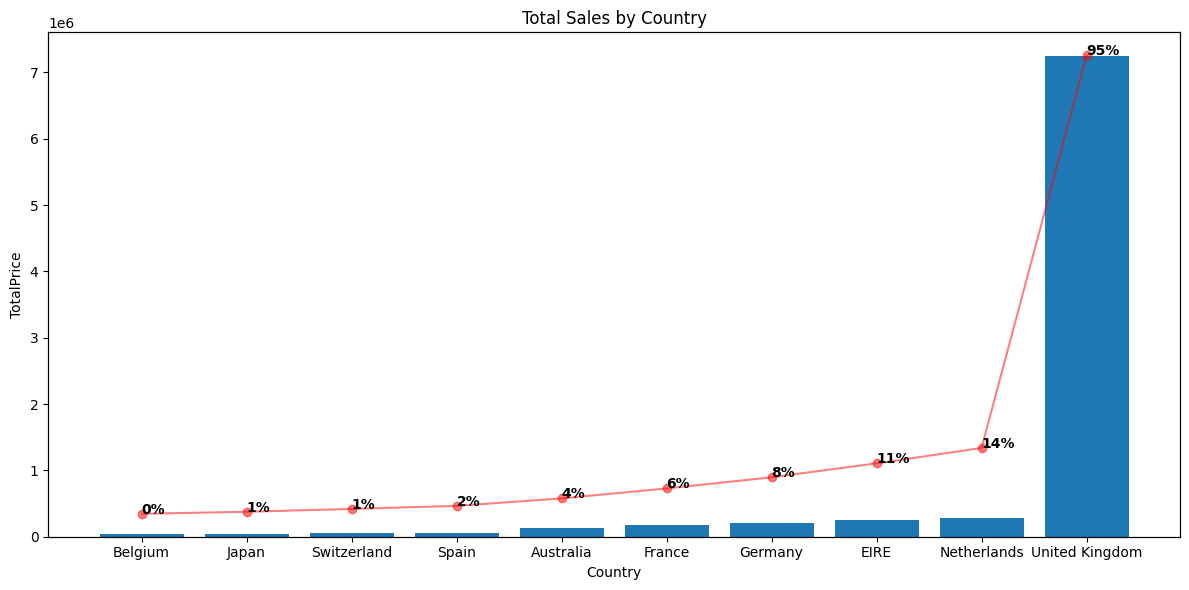

In [2389]:
def pareto_plot(df, x=None, y=None, title=None, show_pct_y=False, pct_format='{0:.0%}'):
    xlabel = x
    ylabel = y
    tmp = df.sort_values(y, ascending=True)
    x = tmp[x].values
    y = tmp[y].values
    weights = y / 8911407.904
    cumsum = weights.cumsum()

    fig, ax1 = plt.subplots(figsize=(12,6))
    ax1.bar(x, y)
    ax1.set_xlabel(xlabel, rotation='horizontal')
    ax1.set_ylabel(ylabel)

    ax2 = ax1.twinx()
    ax2.plot(x, cumsum, '-ro', alpha=0.5)
    ax2.set_ylabel('', color='r')
    ax2.tick_params('y', colors='r')
    
    vals = ax2.get_yticks()
    ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

    # hide y-labels on right side
    if not show_pct_y:
        ax2.set_yticks([])
    
    formatted_weights = [pct_format.format(x) for x in cumsum]
    for i, txt in enumerate(formatted_weights):
        ax2.annotate(txt, (x[i], cumsum[i]), fontweight='heavy')    
    
    if title:
        plt.title(title)
    
    plt.tight_layout()
    plt.savefig('../Dataset/pareto.png')
    plt.show()

pareto_plot(top_10, x='Country', y='TotalPrice', title='Total Sales by Country')


# Modeling

In [2390]:
# Tentukan snapshot date 1 hari setelah transaksi terakhir
snapshot_date = df_clean['InvoiceDate'].max() + pd.Timedelta(days=1)

# Hitung RFM
rfm = df_clean.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
}).reset_index()

rfm.rename(columns={'InvoiceDate':'Recency',
                    'InvoiceNo':'Frequency',
                    'TotalPrice':'Monetary'}, inplace=True)


rfm.to_csv("../Dataset/rfm.csv", index=False)

In [2391]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1437.24
3,12349.0,19,1,1457.55
4,12350.0,310,1,294.40


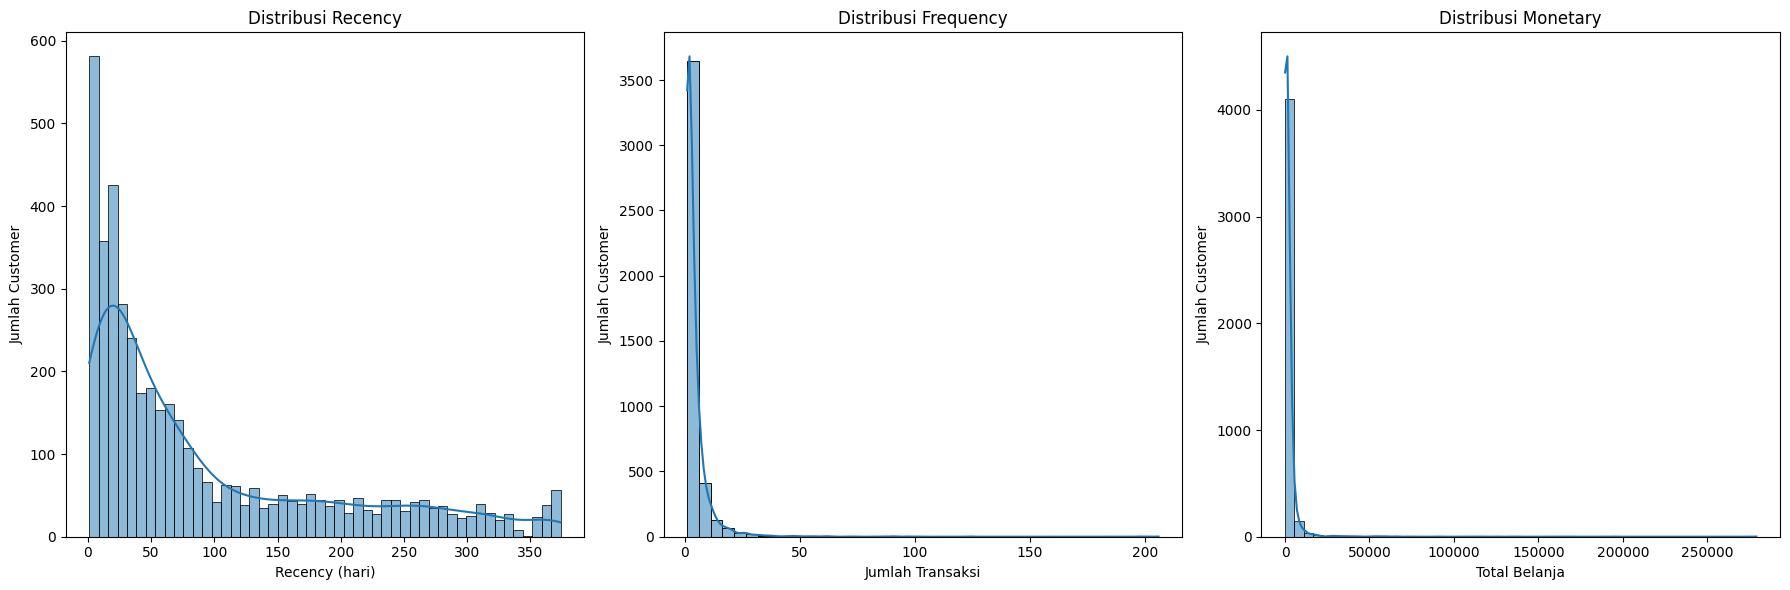

In [2392]:
plt.figure(figsize=(18,6))

# Recency
plt.subplot(1,3,1)
sns.histplot(rfm['Recency'], bins = 50, kde=True)
plt.title("Distribusi Recency")
plt.xlabel("Recency (hari)")
plt.ylabel("Jumlah Customer")

# Frequency
plt.subplot(1,3,2)
sns.histplot(rfm['Frequency'], bins=40, kde=True)
plt.title("Distribusi Frequency")
plt.xlabel("Jumlah Transaksi")
plt.ylabel("Jumlah Customer")

# Monetary
plt.subplot(1,3,3)
sns.histplot(rfm['Monetary'], bins = 50, kde=True)
plt.title("Distribusi Monetary")
plt.xlabel("Total Belanja")
plt.ylabel("Jumlah Customer")

plt.tight_layout()
plt.show()

#### Insight yang didapat : 
1. Distribusi Recency (Keterkinian)
Plot: Distribusi menurun tajam di awal(right-skewed).

Insight:
- Basis Pelanggan Aktif Tinggi: Sebagian besar pelanggan memiliki nilai Recency yang sangat rendah (sekitar 0 hingga 50 hari). Ini berarti sebagian besar transaksi terjadi baru-baru ini, menunjukkan basis pelanggan yang cukup aktif dan terlibat dalam periode waktu yang dekat.

- Potensi Churn/Pelanggan Lama: Terdapat sejumlah kecil pelanggan dengan Recency tinggi (mendekati 350 hari). Pelanggan ini sudah lama tidak bertransaksi dan mungkin berisiko churn (berhenti membeli).

2. Distribusi Frequency (Frekuensi)
Plot: Distribusi sangat miring ke kanan (heavily right-skewed) dengan puncak yang sangat tinggi di sekitar nol.

Insight:

- Pelanggan Sekali Beli Dominan: Mayoritas pelanggan (sekitar 3500+ pelanggan) hanya melakukan 1 hingga 2 transaksi saja. Ini menunjukkan bahwa bisnis ini memiliki banyak pelanggan yang hanya mencoba atau membeli sekali, tetapi sulit untuk mempertahankan mereka agar membeli lagi (repeat purchase).

- Pelanggan Loyal Kecil: Hanya segelintir pelanggan yang memiliki Frequency sangat tinggi (misalnya di atas 50 transaksi). Kelompok ini adalah pelanggan loyal yang sangat berharga dan harus dipertahankan.

3. Distribusi Monetary (Moneter)
Plot: Distribusi juga sangat miring ke kanan, dengan puncak yang sangat tinggi mendekati nol.

Insight:

- Nilai Belanja Kecil Dominan: Mayoritas pelanggan memiliki Total Belanja yang relatif kecil (berada di titik awal sumbu x). Hal ini sesuai dengan temuan Frequency, di mana banyak pelanggan hanya membeli sekali dengan jumlah kecil.

- Pelanggan Bernilai Tinggi: Meskipun jumlahnya sedikit, terdapat beberapa pelanggan yang memiliki nilai Monetary sangat tinggi (hingga lebih dari Rp 2.500.000). Kelompok ini dikenal sebagai High-Value Customers atau Whales yang menyumbang persentase signifikan dari total pendapatan.

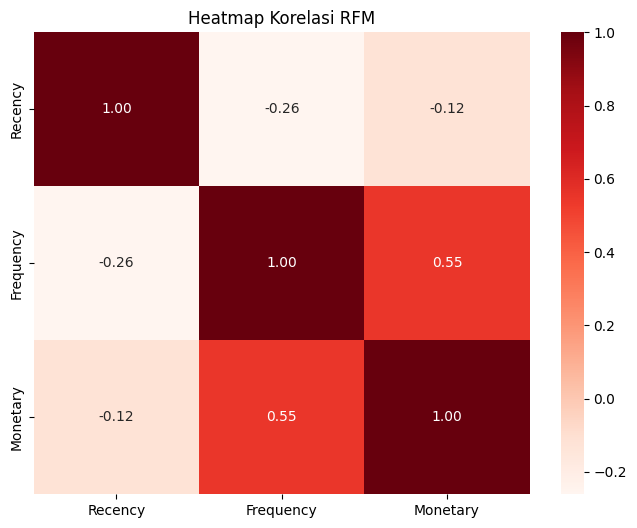

In [2393]:
df_corr = rfm.drop(columns=["CustomerID"])
corr = df_corr.corr()
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="Reds", ax=ax)
ax.set_title("Heatmap Korelasi RFM")
plt.show()

1. Korelasi Positif Kuat:
    - Frequency dan Monetary (0.55):

        Insight: Terdapat korelasi positif yang cukup kuat. Artinya, pelanggan yang lebih sering berbelanja (Frequency tinggi) cenderung memiliki total pengeluaran -yang lebih besar (Monetary tinggi).

        Implikasi: Frequency adalah prediktor yang baik untuk Monetary. Strategi untuk meningkatkan frekuensi pembelian akan secara langsung berkontribusi pada peningkatan pendapatan.

2. Korelasi Negatif Sedang:
    - Recency dan Frequency (-0.26):

        Insight: Terdapat korelasi negatif yang sedang. Artinya, semakin baru pelanggan bertransaksi (Recency rendah), semakin sering mereka cenderung berbelanja (Frequency tinggi).

        Implikasi: Pelanggan yang aktif saat ini (Recency rendah) adalah juga pelanggan yang sering membeli. Penting untuk menjaga pelanggan aktif ini agar tidak menjadi "lama" (Recency tinggi).

    - Recency dan Monetary (-0.12):

        Insight: Terdapat korelasi negatif yang lemah. Artinya, pelanggan yang lebih baru bertransaksi (Recency rendah) cenderung memiliki Monetary yang sedikit lebih tinggi, namun hubungannya tidak sekuat dengan Frequency.

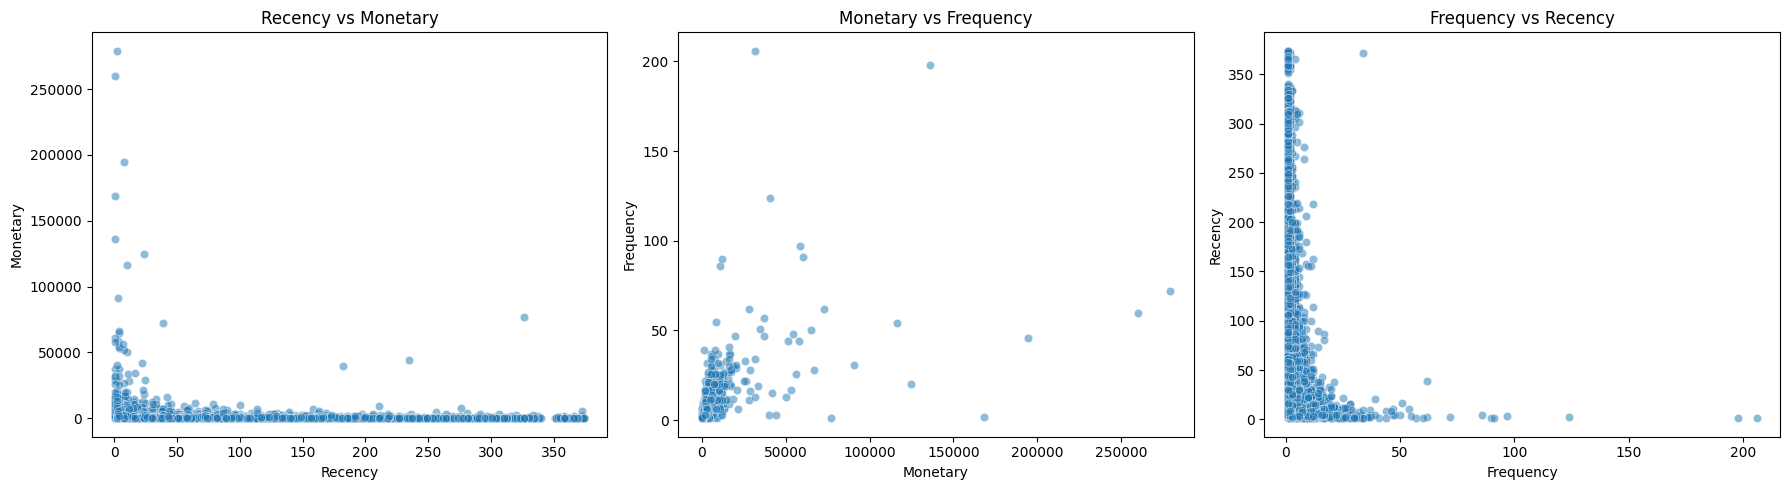

In [2394]:
plt.figure(figsize=(18,5))

# 1. Recency vs Monetary
plt.subplot(1,3,1)
sns.scatterplot(data=rfm, x='Recency', y='Monetary', alpha=0.5)
plt.title("Recency vs Monetary")

# 2. Monetary vs Frequency
plt.subplot(1,3,2)
sns.scatterplot(data=rfm, x='Monetary', y='Frequency', alpha=0.5)
plt.title("Monetary vs Frequency")

# 3. Frequency vs Recency
plt.subplot(1,3,3)
sns.scatterplot(data=rfm, x='Frequency', y='Recency', alpha=0.5)
plt.title("Frequency vs Recency")

plt.tight_layout() 
plt.show()

1. Recency vs Monetary (Recency di Sumbu X, Monetary di Sumbu Y)
    Pola Umum: Sebagian besar titik data berkumpul di area Recency rendah (dekat 0 hari) dan Monetary rendah (dekat 0).

    Hubungan: Secara umum, ketika Recency meningkat (semakin lama pelanggan tidak membeli), Monetary cenderung turun, atau setidaknya tidak ada peningkatan Monetary yang jelas. Ini sesuai dengan korelasi negatif yang lemah (-0.12).

    Insight Penting (Outliers): Ada beberapa outlier di area Recency rendah (baru beli) yang memiliki Monetary sangat tinggi (di atas 100.000, bahkan hingga 250.000). Ini adalah Pelanggan Terbaik (Best Customers). Ada juga beberapa outlier dengan Recency sangat tinggi (sudah lama tidak beli, >300 hari) tetapi Monetary mereka tetap rendah.

2. Monetary vs Frequency (Monetary di Sumbu X, Frequency di Sumbu Y)
    Pola Umum: Sebagian besar titik data berkumpul di area Monetary dan Frequency yang rendah.

    Hubungan: Ada kecenderungan yang jelas, yaitu semakin tinggi Monetary (pengeluaran total), semakin tinggi pula Frequency (frekuensi pembelian). Pola ini mendukung korelasi positif yang kuat (0.55).

    Insight Penting (Outliers):Terdapat beberapa Pelanggan Berharga Tinggi yang:
    - Memiliki Monetary sangat tinggi (hingga 250.000) meskipun Frequency-nya moderat (di bawah 50 kali). Ini mungkin pelanggan yang melakukan pembelian besar, tetapi jarang.

    - Memiliki Frequency sangat tinggi (hingga 200 kali) meskipun Monetary-nya relatif moderat. Ini mungkin pelanggan yang melakukan pembelian kecil, tetapi sangat sering.

3. Frequency vs Recency (Frequency di Sumbu X, Recency di Sumbu Y)
    Pola Umum: Titik data sangat terkonsentrasi di sudut kiri bawah (Frequency rendah dan Recency rendah). Ini menunjukkan bahwa banyak pelanggan baru saja membeli, tetapi hanya sekali atau dua kali.

    Hubungan: Grafik menunjukkan hubungan non-linier yang kuat: Ketika Frequency meningkat, Recency cenderung menurun dengan cepat. Artinya, pelanggan yang sering membeli adalah pelanggan yang baru-baru ini membeli. Pola ini mendukung korelasi negatif sedang (-0.26).

    Insight Penting: Garis kepadatan data yang curam ini menunjukkan bahwa keterkinian pembelian (Recency) sangat bergantung pada seberapa sering pelanggan membeli (Frequency). Jika Anda berhenti membeli, Anda dengan cepat menjadi pelanggan "lama" (Recency tinggi).

## Modeling PCA dan Visualisasi Cluster

In [2395]:
from sklearn.preprocessing import StandardScaler
X = rfm[['Recency', 'Frequency', 'Monetary']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### K Optimal Berdasarkan Elbow Method

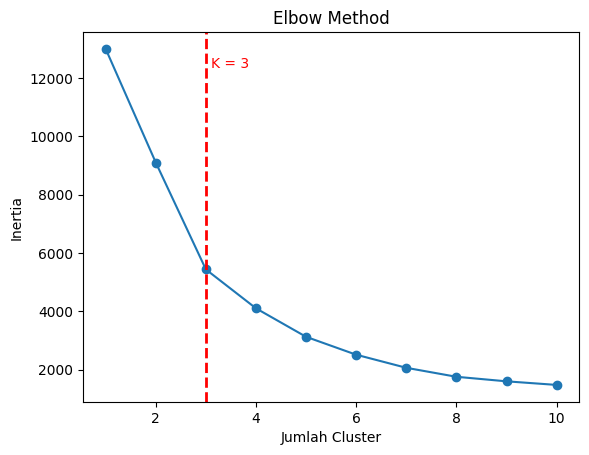

In [2396]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np


inertia = []
K = range(1, 11)

for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_scaled)
    inertia.append(model.inertia_)

plt.plot(K, inertia, marker='o')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.title('Elbow Method')

deltas = np.diff(inertia)
ratio = deltas[1:] / deltas[:-1]
k_optimal_elbow = np.argmin(ratio) + 2

plt.axvline(x=k_optimal_elbow, color='red', linestyle='--', linewidth=2)
plt.text(k_optimal_elbow + 0.1, max(inertia)*0.95, f'K = {k_optimal_elbow}', color='red')

plt.show()



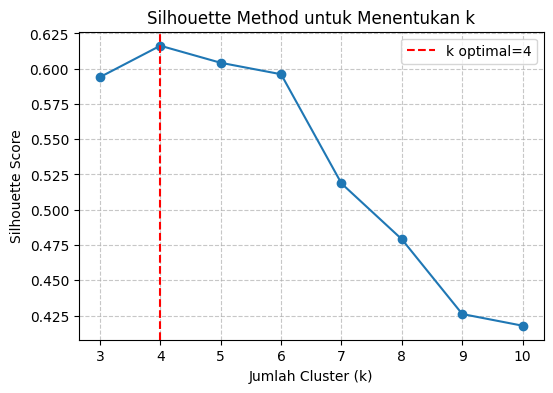

Jumlah cluster berdasarkan Elbow: 3
Silhouette Scores untuk k>=3: {3: np.float64(0.5940014908816534), 4: np.float64(0.6162696093073907), 5: np.float64(0.604173839146124), 6: np.float64(0.5960466176699958), 7: np.float64(0.5186191670308722), 8: np.float64(0.47905354327664235), 9: np.float64(0.42606418730820494), 10: np.float64(0.4177757246549193)}
Jumlah cluster terpilih (gabungan Elbow & Silhouette): 4


In [2397]:
from sklearn.metrics import silhouette_score

sil_scores = []
K_sil = range(3, 11)
for k in K_sil:
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(X_scaled)
    sil_scores.append(silhouette_score(X_scaled, labels))

k_optimal_sil = K_sil[np.argmax(sil_scores)]

# Plot
plt.figure(figsize=(6,4))
plt.plot(K_sil, sil_scores, marker='o')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method untuk Menentukan k')
plt.grid(True, linestyle='--', alpha=0.7)
plt.axvline(x=k_optimal_sil, color='red', linestyle='--', label=f'k optimal={k_optimal_sil}')
plt.legend()
plt.show()

# Rumus penggabungan: pilih cluster terbaik dari k_elbow ±1 berdasarkan Silhouette tertinggi
candidate_k = [k_optimal_elbow-1, k_optimal_elbow, k_optimal_elbow+1]
candidate_k = [k for k in candidate_k if k in K_sil]  # pastikan ada di range
best_k = candidate_k[np.argmax([sil_scores[k-3] for k in candidate_k])]  # k-3 karena K_sil mulai dari 3



print("Jumlah cluster berdasarkan Elbow:", k_optimal_elbow)
print("Silhouette Scores untuk k>=3:", dict(zip(K_sil, sil_scores)))
print("Jumlah cluster terpilih (gabungan Elbow & Silhouette):", best_k)

In [2398]:
# Modeling dengan k optimal dari Elbow Method
kmeans = KMeans(n_clusters=best_k, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(X_scaled)

rfm.groupby('Cluster')[['Recency','Frequency','Monetary']].mean()

,Recency,Frequency,Monetary
Cluster,,,
0,43.842693,3.638752,1322.511245
1,248.541276,1.543152,474.115741
2,7.384615,81.769231,125712.086154
3,15.395238,21.971429,12240.554286


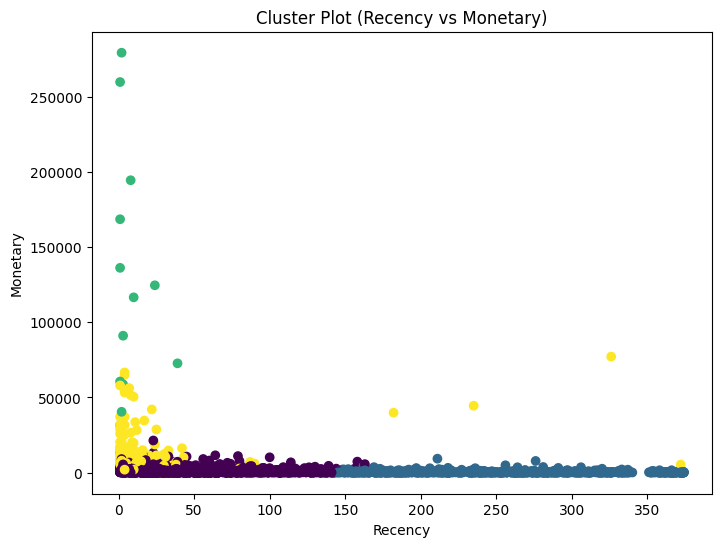

In [2399]:
plt.figure(figsize=(8, 6))
plt.scatter(rfm['Recency'], rfm['Monetary'], c=rfm['Cluster'])
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.title('Cluster Plot (Recency vs Monetary)')
plt.show()


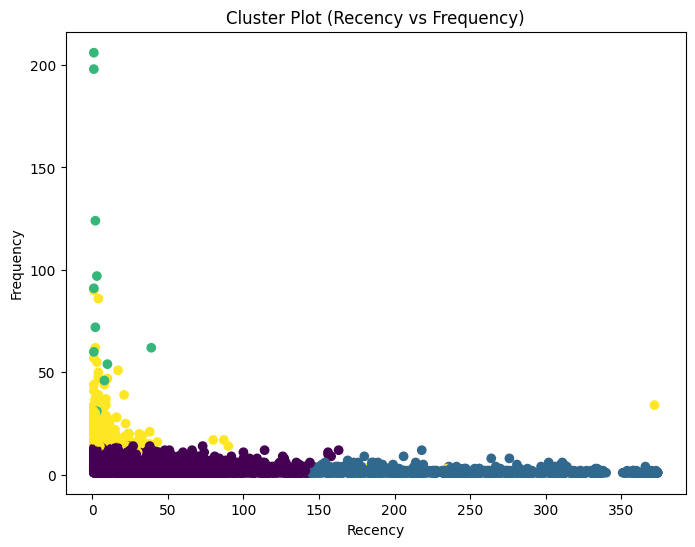

In [2400]:
plt.figure(figsize=(8, 6))
plt.scatter(rfm['Recency'], rfm['Frequency'], c=rfm['Cluster'])
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Cluster Plot (Recency vs Frequency)')
plt.show()

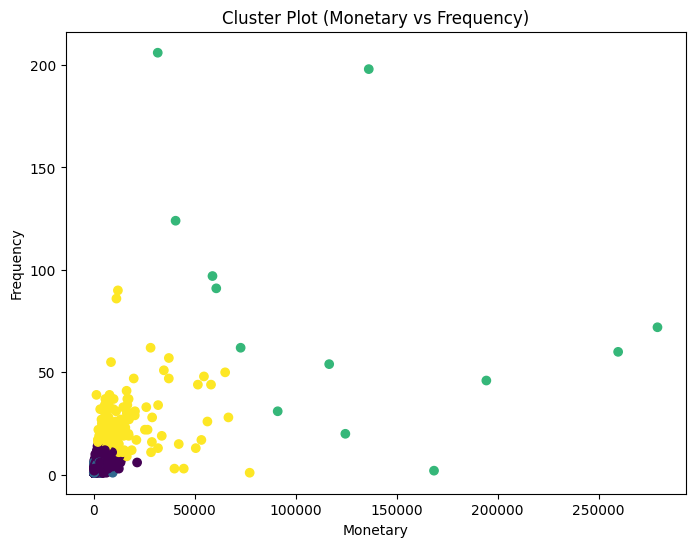

In [2401]:
plt.figure(figsize=(8, 6))
plt.scatter(rfm['Monetary'], rfm['Frequency'], c=rfm['Cluster'])
plt.xlabel('Monetary')
plt.ylabel('Frequency')
plt.title('Cluster Plot (Monetary vs Frequency)')
plt.show()

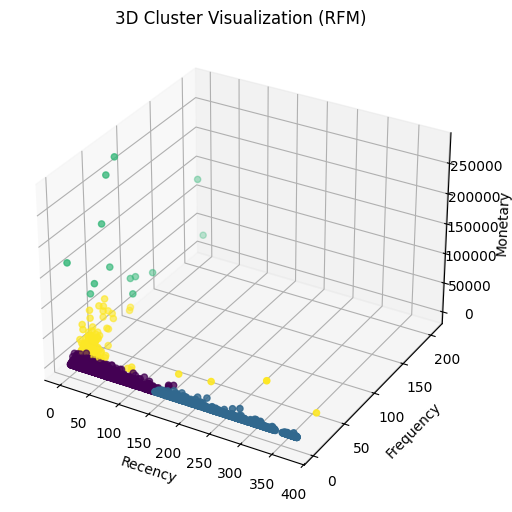

In [2402]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

x = rfm['Recency']
y = rfm['Frequency']
z = rfm['Monetary']
cluster = rfm['Cluster']

scatter = ax.scatter(x, y, z, c=cluster)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title('3D Cluster Visualization (RFM)')
plt.show()


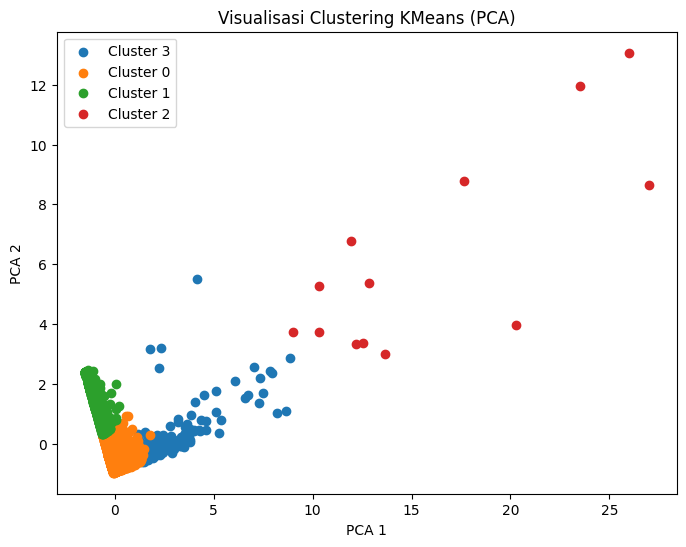

In [2403]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
rfm_pca = rfm.copy()
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

rfm_pca['PCA1'] = pca_result[:, 0]
rfm_pca['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(8, 6))
for c in rfm_pca['Cluster'].unique():
    cluster_data = rfm_pca[rfm_pca['Cluster'] == c]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {c}')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Visualisasi Clustering KMeans (PCA)')
plt.legend()
plt.show()


In [2404]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X_scaled, rfm['Cluster'])

print("Silhouette Score model final:", sil_score)


Silhouette Score model final: 0.6162696093073907


# Conclusion

In [2405]:
rfm.groupby('Cluster')[['Recency','Frequency','Monetary']].mean()

,Recency,Frequency,Monetary
Cluster,,,
0,43.842693,3.638752,1322.511245
1,248.541276,1.543152,474.115741
2,7.384615,81.769231,125712.086154
3,15.395238,21.971429,12240.554286


In [2406]:
rfm["Cluster"] = kmeans.labels_
grouped_cluster = rfm.groupby("Cluster")
for column in rfm.columns:
  if (column == "CustomerID") | (column == "Cluster"): continue
  display(column)
  display(grouped_cluster[column].describe())

'Recency'

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,3045.0,43.842693,36.090982,1.0,15.0,33.0,65.00,163.0
1,1066.0,248.541276,66.216891,144.0,190.0,243.0,301.00,374.0
2,13.0,7.384615,11.485777,1.0,1.0,2.0,8.00,39.0
3,210.0,15.395238,40.320735,1.0,3.0,5.0,14.75,372.0


'Frequency'

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,3045.0,3.638752,2.801388,1.0,1.0,3.0,5.0,14.0
1,1066.0,1.543152,1.060833,1.0,1.0,1.0,2.0,12.0
2,13.0,81.769231,62.456857,2.0,46.0,62.0,97.0,206.0
3,210.0,21.971429,11.505736,1.0,15.0,19.0,25.0,90.0


'Monetary'

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,3045.0,1322.511245,1496.635111,5.90,379.450,808.44,1740.4800,21429.39
1,1066.0,474.115741,627.915583,3.75,167.325,308.97,529.6850,9341.26
2,13.0,125712.086154,80133.892909,31650.78,60632.750,116560.08,168472.5000,279138.02
3,210.0,12240.554286,12818.759041,1296.44,5227.960,7625.63,12574.9825,77183.60


#### Paling loyal

In [2407]:
loyal_cust = rfm[rfm['Cluster'] == 2].sort_values(by='Frequency', ascending=False)
loyal_cust.head(10)

,CustomerID,Recency,Frequency,Monetary,Cluster
326,12748.0,1,206,31650.78,2
1879,14911.0,1,198,136161.83,2
4007,17841.0,2,124,40495.99,2
562,13089.0,3,97,58762.08,2
2176,15311.0,1,91,60632.75,2
1689,14646.0,2,72,279138.02,2
2700,16029.0,39,62,72708.09,2
4197,18102.0,1,60,259657.30,2
1333,14156.0,10,54,116560.08,2
3725,17450.0,8,46,194390.79,2


#### Paling Banyak Spent duit

In [2408]:
most_spent_cust = rfm[rfm['Cluster'] == 2].sort_values(by='Monetary', ascending=False)
most_spent_cust.head(10)

,CustomerID,Recency,Frequency,Monetary,Cluster
1689,14646.0,2,72,279138.02,2
4197,18102.0,1,60,259657.30,2
3725,17450.0,8,46,194390.79,2
3006,16446.0,1,2,168472.50,2
1879,14911.0,1,198,136161.83,2
55,12415.0,24,20,124564.53,2
1333,14156.0,10,54,116560.08,2
3768,17511.0,3,31,91062.38,2
2700,16029.0,39,62,72708.09,2
2176,15311.0,1,91,60632.75,2


### Best Customers

In [2411]:
rfm['R_score'] = pd.qcut(rfm['Recency'], 4, labels=[4,3,2,1]).astype(int)
rfm['F_score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1,2,3,4]).astype(int)
rfm['M_score'] = pd.qcut(rfm['Monetary'], 4, labels=[1,2,3,4]).astype(int)
rfm['RFM_score'] = rfm['R_score'] + rfm['F_score'] + rfm['M_score']
best_customers = rfm.sort_values('RFM_score', ascending=False)
best_customers.head(10)


,CustomerID,Recency,Frequency,Monetary,Cluster,R_score,F_score,M_score,RFM_score
4332,18283.0,4,16,2039.58,3,4,4,4,12
4323,18272.0,3,6,3078.58,0,4,4,4,12
1,12347.0,2,7,4310.00,0,4,4,4,12
4305,18245.0,7,7,2567.06,0,4,4,4,12
4303,18241.0,10,17,2073.09,3,4,4,4,12
4294,18230.0,9,7,2810.20,0,4,4,4,12
4293,18229.0,12,20,7276.90,3,4,4,4,12
34,12388.0,16,6,2780.66,0,4,4,4,12
4289,18225.0,3,12,5504.96,0,4,4,4,12
4287,18223.0,5,14,6484.54,3,4,4,4,12


#### Cluster Terbaik

In [2413]:
cluster_stats = rfm.groupby("Cluster").agg({
    "Recency": "mean",
    "Frequency": "mean",
    "Monetary": "mean"
})

best_cluster = cluster_stats.sort_values(
    ["Recency", "Frequency", "Monetary"],
    ascending=[True, False, False]
).index[0]

print("Best Cluster berdasarkan RFM:", best_cluster)


Best Cluster berdasarkan RFM: 2
